<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/pandas_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [16]:
df = pd.read_json(url)

In [8]:
df.get('patients_summary').get('data')

[{'小計': 1, '日付': '2020-01-24T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-25T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-26T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-27T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-28T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-29T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-30T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-31T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-01T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-02T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-03T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-04T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-05T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-06T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-07T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-08T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-09T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-10T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-11T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-12T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-02-13T08:00:00.000Z'},
 {'小計': 2, '日付': '2020-02-14T08:00

In [17]:
df = pd.DataFrame(df['patients_summary']['data'])

In [18]:
df

,日付,小計
0,2020-01-24T08:00:00.000Z,1
1,2020-01-25T08:00:00.000Z,1
2,2020-01-26T08:00:00.000Z,0
3,2020-01-27T08:00:00.000Z,0
4,2020-01-28T08:00:00.000Z,0
...,...,...
512,2021-06-19T08:00:00.000Z,388
513,2021-06-20T08:00:00.000Z,376
514,2021-06-21T08:00:00.000Z,236
515,2021-06-22T08:00:00.000Z,435


In [19]:
df.index = pd.to_datetime(df['日付'])

In [20]:
df

,日付,小計
日付,,
2020-01-24 08:00:00+00:00,2020-01-24T08:00:00.000Z,1
2020-01-25 08:00:00+00:00,2020-01-25T08:00:00.000Z,1
2020-01-26 08:00:00+00:00,2020-01-26T08:00:00.000Z,0
2020-01-27 08:00:00+00:00,2020-01-27T08:00:00.000Z,0
2020-01-28 08:00:00+00:00,2020-01-28T08:00:00.000Z,0
...,...,...
2021-06-19 08:00:00+00:00,2021-06-19T08:00:00.000Z,388
2021-06-20 08:00:00+00:00,2021-06-20T08:00:00.000Z,376
2021-06-21 08:00:00+00:00,2021-06-21T08:00:00.000Z,236


In [39]:
w_mean = df.groupby(pd.Grouper(freq='W')).mean()

In [40]:
smonth_mean = df.groupby(pd.Grouper(freq='SM')).mean()

In [41]:
month_mean = df.groupby(pd.Grouper(freq='M')).mean()

In [42]:
q_mean = df.groupby(pd.Grouper(freq='Q')).mean()

In [43]:
w_mean_2 = df.resample('W').mean()

In [44]:
smonth_mean_2 = df.resample('SM').mean()

In [45]:
month_mean_2 = df.resample('M').mean()

In [46]:
q_mean_2 = df.resample('Q').mean()

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from tqdm.notebook import tqdm

%matplotlib inline

In [48]:
sns.set()

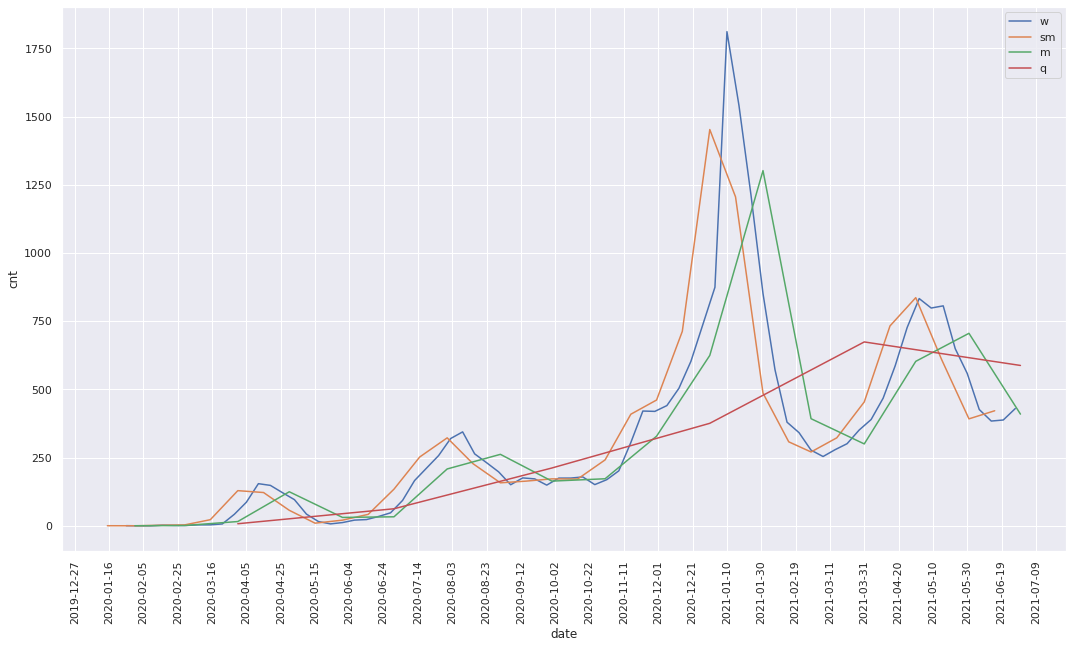

In [49]:
fig, ax = plt.subplots(figsize = (18,10)) 

x = df['日付']

ax.plot(w_mean, label='w')
ax.plot(smonth_mean, label='sm')
ax.plot(month_mean, label='m')
ax.plot(q_mean, label='q')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

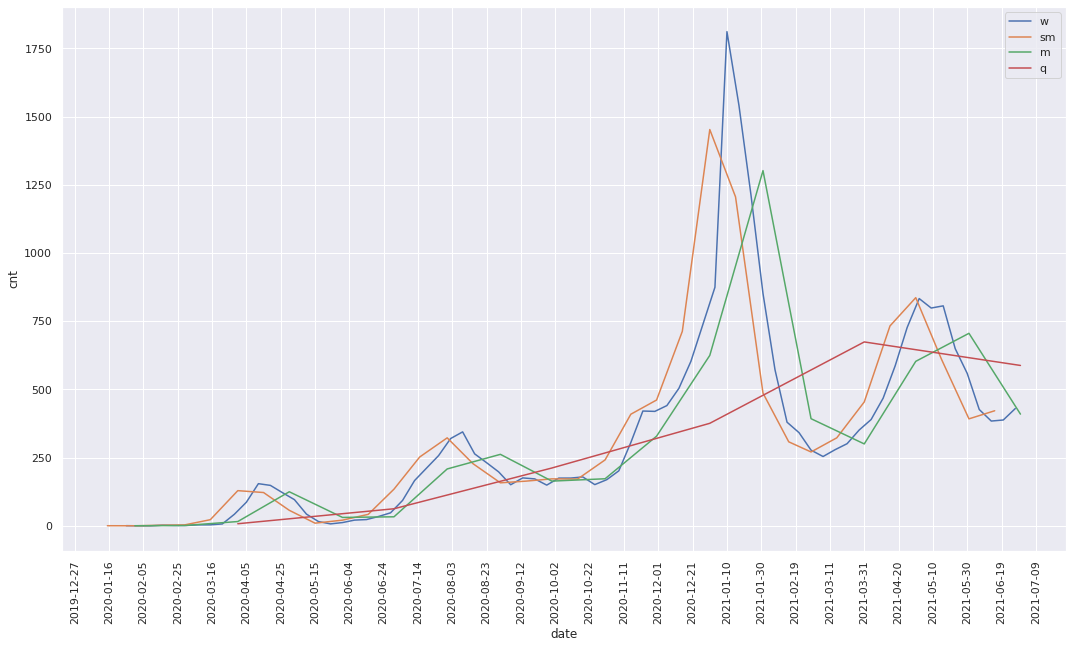

In [51]:
fig, ax = plt.subplots(figsize = (18,10)) 

x = df['日付']

ax.plot(w_mean_2, label='w')
ax.plot(smonth_mean_2, label='sm')
ax.plot(month_mean_2, label='m')
ax.plot(q_mean_2, label='q')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))